# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [ ]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

In [ ]:
ames.describe()

We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [ ]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

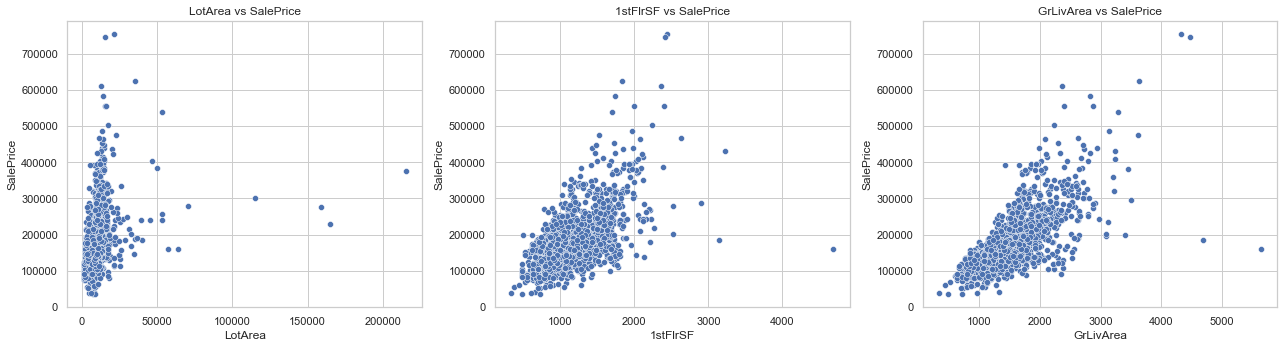

In [6]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set(style="whitegrid")

# List of features to plot
features = ['LotArea', '1stFlrSF', 'GrLivArea']

# Create scatter plots
plt.figure(figsize=(18, 5))  
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=ames_subset, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()

In [7]:
# Your written answer here - do these seem like good candidates for linear regression?
#Lot area is not a good choice whereas the two are okay
ames_subset.corr()['SalePrice']

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [27]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
x_baseline = ames_subset['GrLivArea']

In [28]:
# Your code here - import StatsModels, fit baseline model, display results
baseline_model = sm.OLS(endog=y,exog=sm.add_constant(x_baseline)).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 14 May 2025   Prob (F-statistic):          4.52e-223
Time:                        12:26:21   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [29]:
# Your written answer here - interpret model results
"""The slope of the relation is 107.1304 and the y-intercept is 18570 meaning that when the GrdLivArea is 0 the sale Price will be 18570
 GrdLivArea also also explains 50% of the variation in sale price"""

'The slope of the relation is 107.1304 and the y-intercept is 18570 meaning that when the GrdLivArea is 0 the sale Price will be 18570\n GrdLivArea also also explains 50% of the variation in sale price'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [30]:
# Your code here - define X
x_all = ames_subset.drop(columns=['SalePrice'])
x_all.head(3)

,LotArea,1stFlrSF,GrLivArea
Id,,,
1,8450,856,1710
2,9600,1262,1262
3,11250,920,1786


In [31]:
# Your code here - fit model and display results
all_model = sm.OLS(endog=y,exog=sm.add_constant(x_all)).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 14 May 2025   Prob (F-statistic):          4.52e-223
Time:                        12:26:23   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [32]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
"""The slope of the relation is lot area - 0.2841,GridLiveArea - 80.61,1stFlSF - 60.2866 and the y-intercept is -14310 
 Our model explains 57% of the variation in sales price"""

'The slope of the relation is lot area - 0.2841,GridLiveArea - 80.61,1stFlSF - 60.2866 and the y-intercept is -14310 \n Our model explains 57% of the variation in sales price'

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

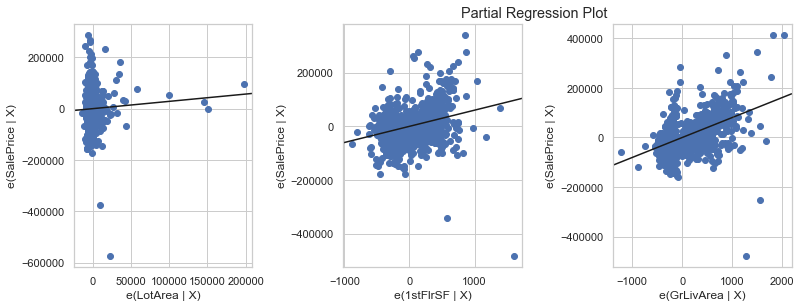

In [33]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    all_model,
    exog_idx=list(x_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [34]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
"The partial regression plots indicate that its not mcuh beneficial to have the lot area in our model. Having GridLivArea is beneficial.1stFlr is not having alinear relatonship but is way better than LotArea"

'The partial regression plots indicate that its not mcuh beneficial to have the lot area in our model. Having GridLivArea is beneficial.1stFlr is not having alinear relatonship but is way better than LotArea'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [37]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

sklearn_baseline_model = LinearRegression()
# passing in the same X and y, although the order is reversed
sklearn_baseline_model.fit(x_baseline.values.reshape(-1,1), y)



LinearRegression()

In [41]:
# Your code here - compare R-Squared
print(f"""
StatsModels R-Squared:    {baseline_model.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(x_baseline.values.reshape(-1,1),y)}

StatsModels intercept:    {baseline_model.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient:  {baseline_model.params["GrLivArea"]}
scikit-learn coefficient: {sklearn_baseline_model.coef_[0]}
""")


StatsModels R-Squared:    0.5021486502718042
scikit-learn R-Squared:   0.5021486502718042

StatsModels intercept:    18569.025856487388
scikit-learn intercept:   18569.02585648728

StatsModels coefficient:  107.13035896582515
scikit-learn coefficient: 107.13035896582517



In [ ]:
# Your code here - compare intercept and coefficients

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.